In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import preprocess
import pickle 
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import keras

Using TensorFlow backend.


In [4]:
# creating dictionary for labels
class_labels = {str(x):x for x in range(10)}
class_labels.update({'+':10, 'times':11, '-':12 })
label_class = dict( zip(class_labels.values(), class_labels.keys() ))

path1 = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/Equation data/'
temp1 = np.load(path1+'Equations_images_1.npy')
temp2 = np.load(path1+'Equations_images_2.npy')
temp3 = np.load(path1+'Equations_images_3.npy')
temp4 = np.load(path1+'Equations_images_4.npy')
eqn_full = [temp1]


## Loading saved models for prediction

In [3]:
path = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/trained models/'
adastage1_ver1,adadigits_ver1, adachars_ver1, rfmodel_ver1, MLP_single_ver1 = preprocess.load_models(path,1)
adastage1_ver2,adadigits_ver2, adachars_ver2, rfmodel_ver2, MLP_single_ver2 = preprocess.load_models(path,2)

Loaded model from disk
Loaded model from disk


In [ ]:
path2 = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/trained models/'
with open(path2+'Adaboost_stage1_ver1.1.sav','rb') as f:
    adastage1_ver1 = pickle.load(f)
with open(path2+'Adaboost_digits_ver1.1.sav','rb') as f:
    adadigits_ver1 = pickle.load(f)
with open(path2+'Adaboost_chars_ver1.1.sav','rb') as f:
    adachars_ver1 = pickle.load(f)
with open(path2+'RFmodel_ver1.1.sav','rb') as f:
    rfmodel_ver1 = pickle.load(f)
    
with open(path2+'Adaboost_stage1_ver2.1.sav','rb') as f:
    adastage1_ver2 = pickle.load(f)
with open(path2+'Adaboost_digits_ver2.1.sav','rb') as f:
    adadigits_ver2 = pickle.load(f)
with open(path2+'Adaboost_chars_ver2.1.sav','rb') as f:
    adachars_ver2 = pickle.load(f)
with open(path2+'RFmodel_ver2.1.sav','rb') as f:
    rfmodel_ver2 = pickle.load(f)
    
# load json and create keras model
json_file = open('./trained models/MLP_singlestage_ver1.1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
MLP_single_ver1 = model_from_json(loaded_model_json)
# load weights into new model
MLP_single_ver1.load_weights("./trained models/MLP_singlestage_ver1.1.h5")

# evaluate loaded model on test data
adam1 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
MLP_single_ver1.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam1,metrics=['accuracy'] )

# load json and create keras model
json_file = open('./trained models/MLP_singlestage_ver2.1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
MLP_single_ver2 = model_from_json(loaded_model_json)
# load weights into new model
MLP_single_ver2.load_weights("./trained models/MLP_singlestage_ver2.1.h5")
MLP_single_ver2.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam1,metrics=['accuracy'] )

print("Loaded model from disk")


In [63]:
'({0:1.3f}) '.format( np.max(MLP_single_ver1.predict_proba( temp,verbose = 0 )) )


'(0.768) '

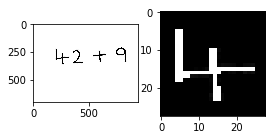

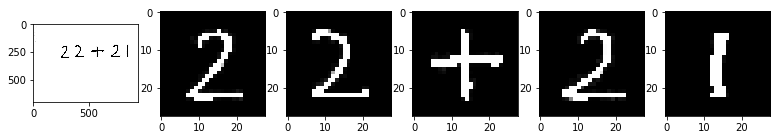

RF model_ver1 result :  2(0.166) 1(0.156) +(0.511) 2(0.205) +(0.336) 
adaboost_ver1 2 stage model result :  8(0.113) 2(0.113) 9(0.112) 2(0.113) +(0.722) 
MLP_ver1 single stage model result :  2(0.994) 2(0.919) +(0.997) 2(1.000) 1(1.000) 

RF model_ver2 result :  1(0.156) times(0.212) +(0.498) 2(0.186) +(0.279) 
adaboost_ver2 2 stage model result :  8(0.111) 2(0.110) 4(0.109) 2(0.110) +(0.376) 
MLP single_ver2 stage model result :  2(0.998) 2(0.999) +(0.992) 2(1.000) 1(0.812) 


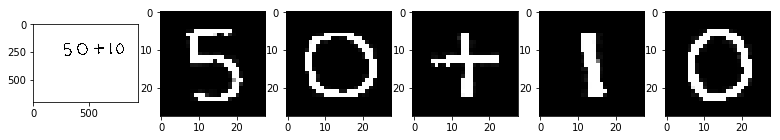

RF model_ver1 result :  3(0.178) 0(0.326) +(0.339) +(0.266) 0(0.425) 
adaboost_ver1 2 stage model result :  5(0.116) 2(0.114) 4(0.113) 1(0.114) 0(0.115) 
MLP_ver1 single stage model result :  5(1.000) 0(1.000) +(0.999) 1(1.000) 0(1.000) 

RF model_ver2 result :  3(0.168) 0(0.387) +(0.465) +(0.265) 0(0.473) 
adaboost_ver2 2 stage model result :  5(0.112) 2(0.111) 4(0.110) +(0.381) 0(0.113) 
MLP single_ver2 stage model result :  5(1.000) 0(1.000) +(1.000) 1(1.000) 0(1.000) 


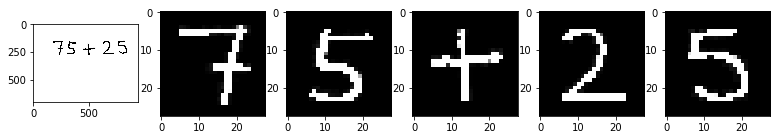

RF model_ver1 result :  -(0.217) times(0.140) +(0.398) 2(0.164) 3(0.183) 
adaboost_ver1 2 stage model result :  4(0.118) 5(0.115) 4(0.111) 2(0.112) 3(0.114) 
MLP_ver1 single stage model result :  3(0.959) 5(1.000) +(0.891) 2(1.000) 5(1.000) 

RF model_ver2 result :  3(0.102) 5(0.115) +(0.418) 1(0.162) 3(0.175) 
adaboost_ver2 2 stage model result :  3(0.113) 5(0.112) 4(0.109) 2(0.110) 3(0.112) 
MLP single_ver2 stage model result :  7(0.868) 5(1.000) +(0.607) 2(1.000) 5(1.000) 


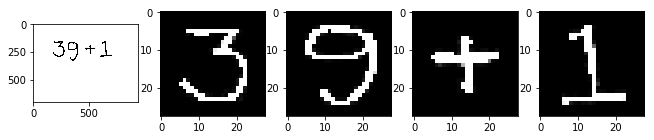

RF model_ver1 result :  0(0.259) 0(0.206) +(0.270) +(0.241) 
adaboost_ver1 2 stage model result :  3(0.111) 5(0.117) 4(0.113) 1(0.110) 
MLP_ver1 single stage model result :  3(0.997) 5(0.760) +(0.948) 3(0.553) 

RF model_ver2 result :  0(0.271) 0(0.206) +(0.393) 1(0.222) 
adaboost_ver2 2 stage model result :  3(0.110) 5(0.113) +(0.388) 1(0.109) 
MLP single_ver2 stage model result :  3(0.999) 5(0.774) +(1.000) 3(0.974) 


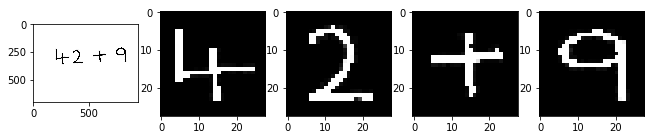

RF model_ver1 result :  +(0.287) 2(0.163) +(0.267) -(0.363) 
adaboost_ver1 2 stage model result :  4(0.111) 2(0.113) 9(0.112) 9(0.112) 
MLP_ver1 single stage model result :  7(0.768) 2(1.000) 1(0.606) 0(0.620) 

RF model_ver2 result :  +(0.200) 2(0.144) +(0.372) -(0.281) 
adaboost_ver2 2 stage model result :  4(0.107) 2(0.110) 9(0.111) 9(0.110) 
MLP single_ver2 stage model result :  4(0.550) 2(1.000) +(1.000) 9(0.999) 


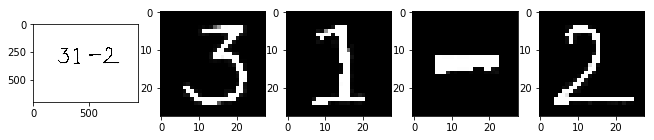

RF model_ver1 result :  3(0.173) +(0.160) -(0.453) times(0.180) 
adaboost_ver1 2 stage model result :  3(0.123) 3(0.113) times(0.651) 8(0.112) 
MLP_ver1 single stage model result :  3(0.995) 1(0.862) +(0.961) 3(0.548) 

RF model_ver2 result :  3(0.165) +(0.170) -(0.811) 1(0.183) 
adaboost_ver2 2 stage model result :  3(0.119) 1(0.118) -(0.430) 1(0.111) 
MLP single_ver2 stage model result :  3(0.991) 3(0.996) -(1.000) 2(1.000) 


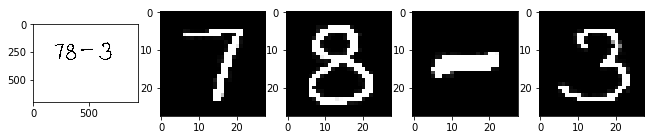

RF model_ver1 result :  3(0.135) times(0.182) -(0.426) -(0.172) 
adaboost_ver1 2 stage model result :  3(0.110) 3(0.120) 4(0.121) 3(0.110) 
MLP_ver1 single stage model result :  7(0.776) 8(0.999) +(0.535) 3(0.948) 

RF model_ver2 result :  7(0.182) times(0.184) -(0.890) 0(0.175) 
adaboost_ver2 2 stage model result :  3(0.109) 3(0.119) 4(0.118) 3(0.110) 
MLP single_ver2 stage model result :  7(0.992) 8(0.999) -(1.000) 3(0.974) 


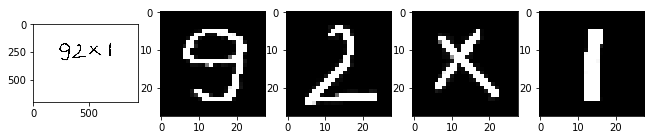

RF model_ver1 result :  3(0.148) 2(0.170) times(0.407) +(0.296) 
adaboost_ver1 2 stage model result :  3(0.111) 8(0.115) 5(0.116) 1(0.118) 
MLP_ver1 single stage model result :  9(0.477) 2(0.997) times(1.000) 1(1.000) 

RF model_ver2 result :  -(0.158) 1(0.154) times(0.293) +(0.312) 
adaboost_ver2 2 stage model result :  3(0.111) 1(0.110) 5(0.111) 1(0.117) 
MLP single_ver2 stage model result :  3(0.543) 2(1.000) times(1.000) 1(1.000) 


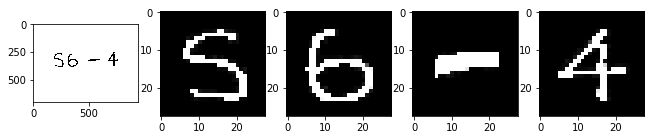

RF model_ver1 result :  3(0.155) -(0.304) +(0.345) 4(0.151) 
adaboost_ver1 2 stage model result :  5(0.113) 5(0.118) times(0.673) 9(0.114) 
MLP_ver1 single stage model result :  5(1.000) 5(0.997) +(0.951) 4(1.000) 

RF model_ver2 result :  3(0.153) -(0.318) -(0.767) +(0.225) 
adaboost_ver2 2 stage model result :  3(0.111) 5(0.114) -(0.428) 4(0.113) 
MLP single_ver2 stage model result :  5(1.000) 5(0.923) -(1.000) 4(1.000) 


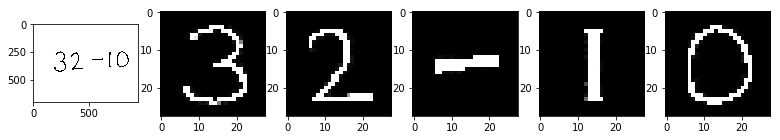

RF model_ver1 result :  -(0.148) 1(0.159) -(0.523) +(0.277) 0(0.250) 
adaboost_ver1 2 stage model result :  3(0.114) 2(0.110) -(0.561) 1(0.120) 5(0.115) 
MLP_ver1 single stage model result :  3(0.998) 2(1.000) -(0.549) 1(1.000) 0(0.999) 

RF model_ver2 result :  3(0.136) 1(0.170) -(0.840) +(0.254) 0(0.310) 
adaboost_ver2 2 stage model result :  3(0.111) 1(0.109) -(0.433) 1(0.118) 5(0.111) 
MLP single_ver2 stage model result :  3(0.999) 2(1.000) -(1.000) 1(1.000) 0(1.000) 


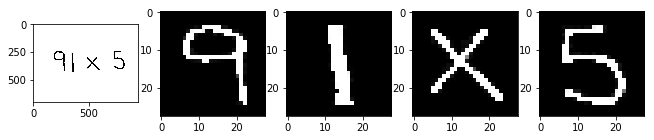

RF model_ver1 result :  0(0.119) +(0.294) times(0.454) 3(0.136) 
adaboost_ver1 2 stage model result :  5(0.113) 1(0.115) 5(0.115) 5(0.117) 
MLP_ver1 single stage model result :  5(0.352) 1(1.000) times(0.961) 5(1.000) 

RF model_ver2 result :  0(0.137) +(0.320) times(0.261) -(0.135) 
adaboost_ver2 2 stage model result :  5(0.109) 1(0.112) 5(0.110) 5(0.111) 
MLP single_ver2 stage model result :  4(0.471) 1(1.000) 4(0.561) 5(1.000) 


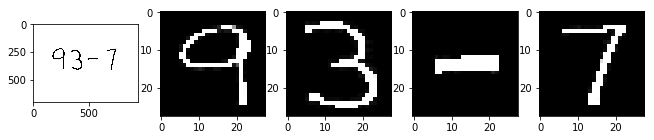

RF model_ver1 result :  -(0.434) -(0.191) -(0.484) 7(0.151) 
adaboost_ver1 2 stage model result :  5(0.114) 3(0.132) times(0.563) 4(0.118) 
MLP_ver1 single stage model result :  4(0.414) 3(0.970) +(0.954) 7(0.956) 

RF model_ver2 result :  -(0.340) -(0.167) -(0.910) 7(0.193) 
adaboost_ver2 2 stage model result :  5(0.111) 3(0.135) -(0.434) 3(0.112) 
MLP single_ver2 stage model result :  4(0.999) 3(0.702) -(1.000) 7(0.991) 


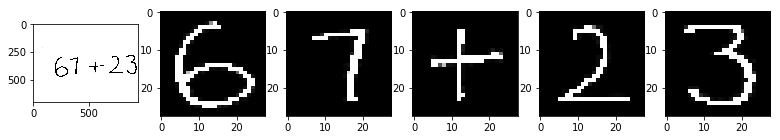

RF model_ver1 result :  -(0.196) 7(0.141) +(0.220) 2(0.175) 0(0.133) 
adaboost_ver1 2 stage model result :  3(0.126) 7(0.110) 5(0.108) 2(0.112) 5(0.114) 
MLP_ver1 single stage model result :  2(0.497) 7(0.809) +(0.956) 2(0.999) 3(1.000) 

RF model_ver2 result :  -(0.136) 7(0.189) +(0.168) 2(0.156) 0(0.163) 
adaboost_ver2 2 stage model result :  3(0.124) 7(0.109) 9(0.106) 2(0.109) 3(0.111) 
MLP single_ver2 stage model result :  5(0.415) 7(0.931) 4(0.628) 2(1.000) 3(0.989) 


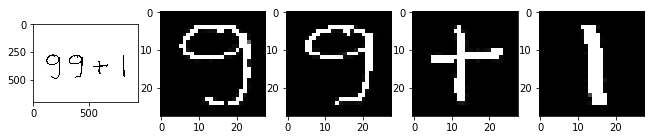

RF model_ver1 result :  0(0.131) 0(0.166) +(0.154) +(0.262) 
adaboost_ver1 2 stage model result :  5(0.119) 5(0.115) 8(0.105) 1(0.120) 
MLP_ver1 single stage model result :  0(0.427) 5(0.777) 8(0.434) 1(1.000) 

RF model_ver2 result :  0(0.153) 0(0.191) +(0.175) +(0.294) 
adaboost_ver2 2 stage model result :  5(0.118) 5(0.111) 8(0.105) 1(0.116) 
MLP single_ver2 stage model result :  5(0.985) 4(0.636) +(1.000) 1(1.000) 


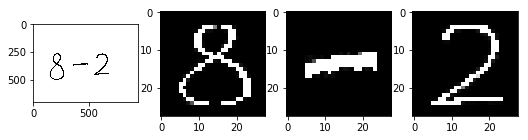

RF model_ver1 result :  times(0.163) -(0.431) 7(0.139) 
adaboost_ver1 2 stage model result :  5(0.118) 4(0.118) 5(0.118) 
MLP_ver1 single stage model result :  8(0.477) +(0.531) 3(0.468) 

RF model_ver2 result :  times(0.136) -(0.890) 7(0.183) 
adaboost_ver2 2 stage model result :  5(0.119) 4(0.114) 5(0.120) 
MLP single_ver2 stage model result :  5(0.714) -(1.000) 2(0.924) 


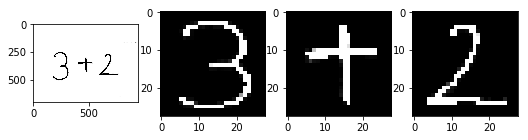

RF model_ver1 result :  -(0.232) times(0.115) 1(0.157) 
adaboost_ver1 2 stage model result :  3(0.128) 9(0.110) 1(0.115) 
MLP_ver1 single stage model result :  3(0.988) 7(0.993) 3(0.902) 

RF model_ver2 result :  -(0.155) +(0.184) 1(0.189) 
adaboost_ver2 2 stage model result :  3(0.127) 9(0.109) 1(0.116) 
MLP single_ver2 stage model result :  3(0.971) +(0.996) 2(0.632) 


In [64]:
# Evaluating each . equation image

for eqns in eqn_full:
    for c in range(len(eqns)):
        # initialising strings to store output of model predictions
        rf_pred_ver1 = ''
        ada_pred_ver1 = ''
        mlp_pred_ver1 = ''
        rf_pred_ver2 = ''
        ada_pred_ver2 = ''
        mlp_pred_ver2 = ''

#         print('\nEquation = ',c)
        eqn1 = eqns[c]
        # extract segments (digits/symbols) from each equation image
        segments= preprocess.extract_segments(eqn1, 35, reshape = 1, size = [28,28], 
                                              area=100, gray = True, dil = True,  ker = 1)

        # run prediction on each segment
        plt.figure(figsize=(20,20))
        for i in range(len(segments)+1):
            if i ==0:
                plt.subplot(191)
                plt.imshow(eqn1,cmap = 'gray')
                
            else :
                # plot each segment
                plt.subplot(191+i)
                temp = segments[i-1]
                plt.imshow(temp,cmap = 'gray')
                temp = temp.reshape(1,-1)

                # Random forest model prediction
                rf_pred_ver1 += label_class[rfmodel_ver1.predict( temp )[0] ]
                rf_pred_ver1 += '({0:1.3f}) '.format(round(np.max(rfmodel_ver1.predict_proba( temp )),3))
                
                # Adaboost model prediction 
                if adastage1_ver1.predict( temp )[0] == 1 : # stage 1 predicts digit
                    ada_pred_ver1 += label_class[adadigits_ver1.predict( temp )[0] ] 
                    ada_pred_ver1 += '({0:1.3f}) '.format(round(np.max(adadigits_ver1.predict_proba( temp )),3))
                    
                else : # stage 1 predicts symbol
                    ada_pred_ver1 += label_class[adachars_ver1.predict( temp )[0] ] 
                    ada_pred_ver1 += '({0:1.3f}) '.format(round(np.max(adachars_ver1.predict_proba( temp )),3))
                    
                # MLP prediction
                mlp_pred_ver1 += label_class[ np.argmax(  MLP_single_ver1.predict( temp ) ) ] 
                mlp_pred_ver1 += '({0:1.3f}) '.format( np.max(MLP_single_ver1.predict_proba( temp,verbose = 0 )) )
                
                
                # Random forest model prediction
                rf_pred_ver2 += label_class[rfmodel_ver2.predict( temp )[0] ]
                rf_pred_ver2 += '({0:1.3f}) '.format(round(np.max(rfmodel_ver2.predict_proba( temp )),3))
                
                # Adaboost model prediction 
                if adastage1_ver2.predict( temp )[0] == 1 : # stage 1 predicts digit
                    ada_pred_ver2 += label_class[adadigits_ver2.predict( temp )[0] ] 
                    ada_pred_ver2 += '({0:1.3f}) '.format(round(np.max(adadigits_ver2.predict_proba( temp )),3))
                    
                else : # stage 1 predicts symbol
                    ada_pred_ver2 += label_class[adachars_ver2.predict( temp )[0] ] 
                    ada_pred_ver2 += '({0:1.3f}) '.format(round(np.max(adachars_ver2.predict_proba( temp )),3))
                    
                # MLP prediction
                mlp_pred_ver2 += label_class[ np.argmax(  MLP_single_ver2.predict( temp ) ) ] 
                mlp_pred_ver2 += '({0:1.3f}) '.format( np.max(MLP_single_ver2.predict_proba( temp,verbose = 0 )) )

                
        plt.show()
        print('RF model_ver1 result : ',rf_pred_ver1)
        print('adaboost_ver1 2 stage model result : ',ada_pred_ver1)
        print('MLP_ver1 single stage model result : ',mlp_pred_ver1)
        print('\nRF model_ver2 result : ',rf_pred_ver2)
        print('adaboost_ver2 2 stage model result : ',ada_pred_ver2)
        print('MLP single_ver2 stage model result : ',mlp_pred_ver2)